# Importing Libraries

In [21]:
import tensorflow as tf
import matplotlib.pyplot as plt
import json
import numpy as np
from sklearn.metrics import classification_report,confusion_matrix
import pandas as pd
import seaborn as sns

# Loading the Model

In [2]:
model = tf.keras.models.load_model('../models/trained_model.keras')

In [3]:
with open("../models/classnames.json","r") as f:
    class_names = json.load(f)

# Evaluate

In [4]:
data_path_valid = '../data/valid'

In [5]:
test_ds = tf.keras.utils.image_dataset_from_directory(
    data_path_valid,
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128,128),
    shuffle=False,
    seed=42,
    validation_split=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True,
)

Found 17572 files belonging to 38 classes.


In [6]:
y_pred = model.predict(test_ds)
y_pred,y_pred.shape

550/550 ━━━━━━━━━━━━━━━━━━━━ 366s 627ms/step


(array([[9.9860400e-01, 2.9336102e-04, 2.0469825e-08, ..., 8.5827347e-23,
         1.0938347e-09, 7.8729022e-14],
        [9.9999964e-01, 1.4359351e-07, 2.2848055e-10, ..., 6.2170803e-23,
         4.4226050e-14, 1.9908460e-16],
        [1.0000000e+00, 1.7927272e-12, 1.1963432e-12, ..., 5.6171117e-25,
         9.9505229e-18, 1.0306365e-18],
        ...,
        [3.5258687e-09, 4.3375079e-15, 4.3787085e-09, ..., 4.8554409e-07,
         7.1111463e-12, 9.9970204e-01],
        [2.7202412e-11, 6.8461317e-24, 9.5626519e-12, ..., 7.3309714e-09,
         6.3375310e-17, 9.9998987e-01],
        [3.3304758e-08, 2.9150373e-09, 2.0512667e-09, ..., 1.2413983e-07,
         3.1038032e-06, 9.8936254e-01]], dtype=float32),
 (17572, 38))

In [7]:
predicted_class = np.argmax(y_pred,axis=1)
predicted_class

array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)

In [8]:
true_class = tf.concat([y for x,y in test_ds],axis=0)
true_class

<tf.Tensor: shape=(17572, 38), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [9]:
y_true = np.argmax(true_class,axis=1)
y_true

array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)

In [18]:
report = classification_report(y_true,predicted_class,target_names=class_names,output_dict=True)
report_df = pd.DataFrame(report).transpose()
report_df

,precision,recall,f1-score,support
Apple___Apple_scab,0.865591,0.958333,0.909605,504.000000
Apple___Black_rot,0.979508,0.961771,0.970558,497.000000
Apple___Cedar_apple_rust,0.960094,0.929545,0.944573,440.000000
Apple___healthy,0.882353,0.926295,0.903790,502.000000
Blueberry___healthy,0.852490,0.980176,0.911885,454.000000
Cherry_(including_sour)___Powdery_mildew,0.964789,0.976247,0.970484,421.000000
Cherry_(including_sour)___healthy,0.997537,0.888158,0.939675,456.000000
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot,0.911548,0.904878,0.908201,410.000000
Corn_(maize)___Common_rust_,0.987526,0.995807,0.991649,477.000000
Corn_(maize)___Northern_Leaf_Blight,0.893069,0.945493,0.918534,477.000000


In [19]:
cfm = confusion_matrix(y_true,predicted_class)
cfm

array([[483,   3,   0, ...,   0,   0,   0],
       [  8, 478,   1, ...,   0,   0,   0],
       [  1,   1, 409, ...,   0,   0,   5],
       ...,
       [  0,   0,   0, ..., 456,   0,   0],
       [  0,   0,   0, ...,   0, 443,   1],
       [  1,   0,   0, ...,   0,   1, 447]], dtype=int64)

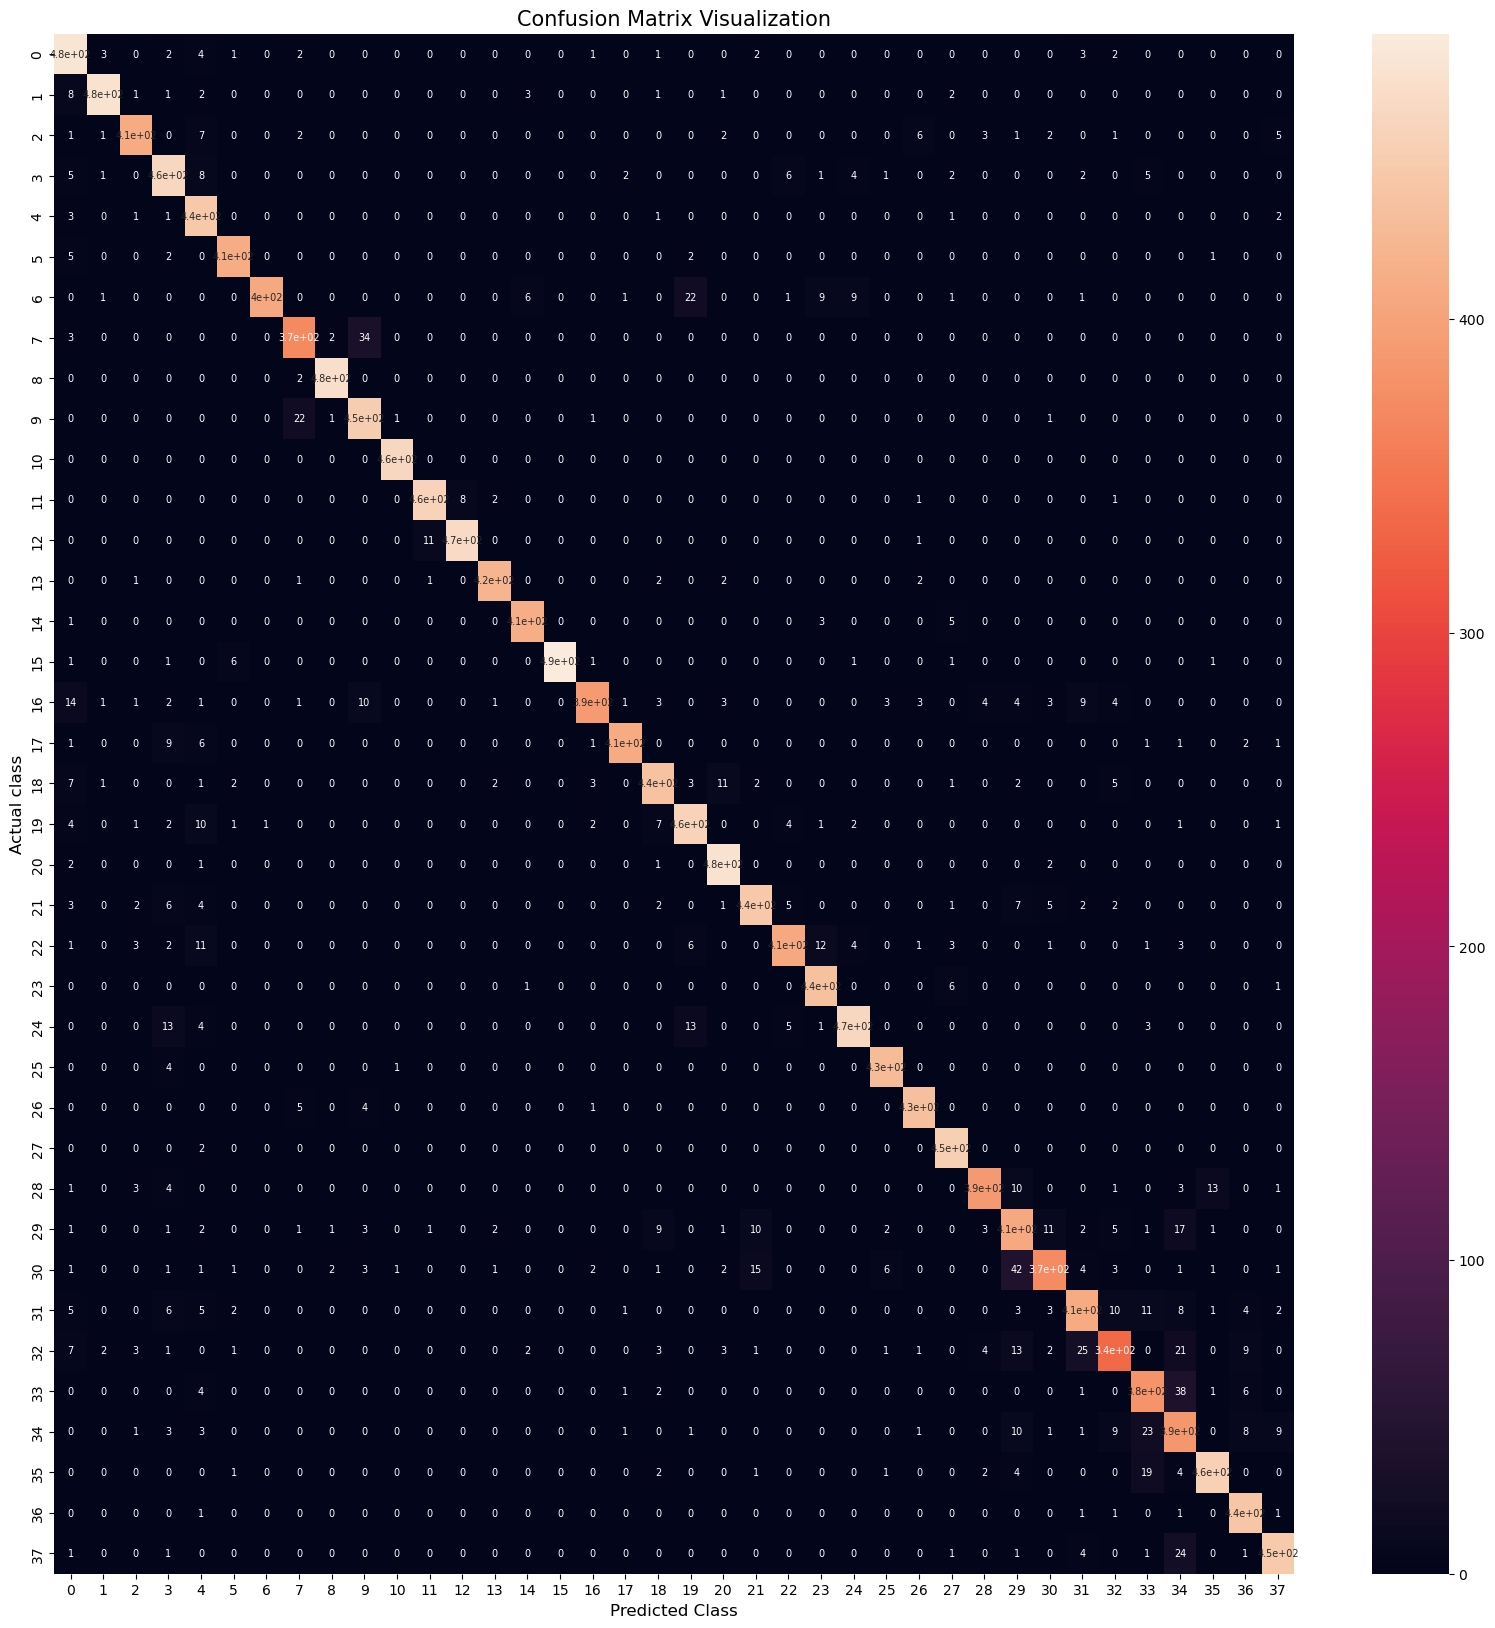

In [27]:
plt.figure(figsize=(20,20))
sns.heatmap(cfm,annot=True,annot_kws={'size':7})
plt.xlabel("Predicted Class",fontsize=12)
plt.ylabel("Actual class",fontsize=12)
plt.title("Confusion Matrix Visualization",fontsize=15)
plt.show()